In [2]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Load the dataset
df = pd.read_csv('TaxiDataCleaned.csv')
df.head()

,pickup_community_area,fare,trip_start_month,trip_start_hour,trip_start_day,trip_start_timestamp,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_miles,payment_type,company,trip_seconds,dropoff_community_area,tips
0,8.0,12.45,5,19,6,1400269500,41.880994,-87.632746,41.899786,-87.648077,0.0,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,0.0,8.0,0.0
1,8.0,0.00,3,19,5,1362683700,41.880994,-87.632746,41.899786,-87.648077,0.0,Unknown,Chicago Elite Cab Corp.,300.0,8.0,0.0
2,60.0,27.05,10,2,3,1380593700,41.836150,-87.648788,41.899786,-87.648077,12.6,Cash,Taxi Affiliation Services,1380.0,8.0,0.0
3,10.0,5.85,10,1,2,1382319000,41.985015,-87.804532,41.899786,-87.648077,0.0,Cash,Taxi Affiliation Services,180.0,8.0,0.0
4,14.0,16.65,5,7,5,1369897200,41.968069,-87.721559,41.899786,-87.648077,0.0,Cash,Dispatch Taxi Affiliation,1080.0,8.0,0.0


## Q 2.a

<Axes: xlabel='trip_start_hour'>

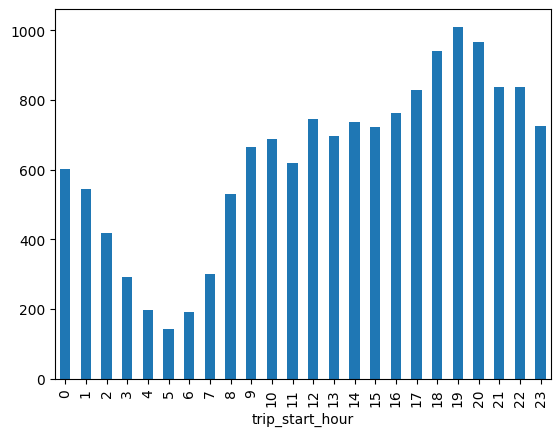

In [16]:
df.groupby('trip_start_hour').count()['tips'].plot(kind='bar')

<Axes: xlabel='trip_start_day'>

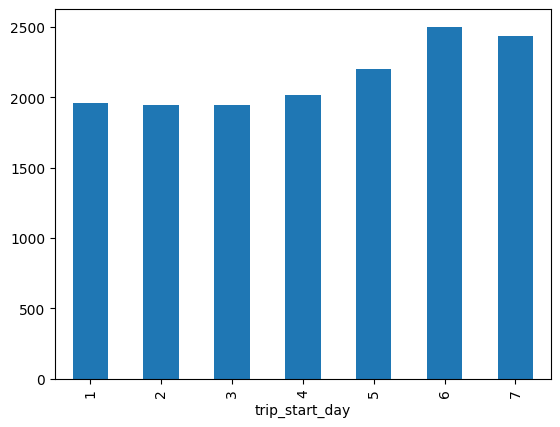

In [17]:
df.groupby('trip_start_day').count()['tips'].plot(kind='bar')

<Axes: xlabel='trip_start_month'>

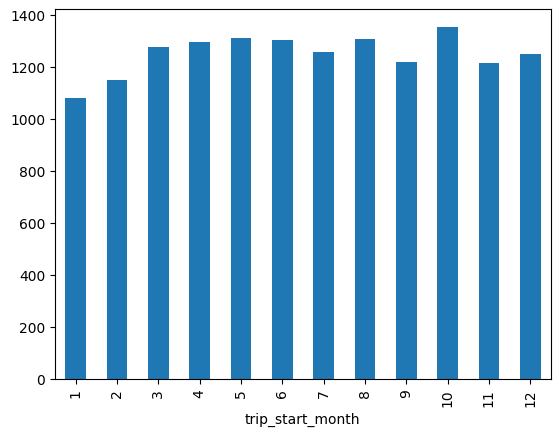

In [18]:
df.groupby('trip_start_month').count()['tips'].plot(kind='bar')

## Q 2.b

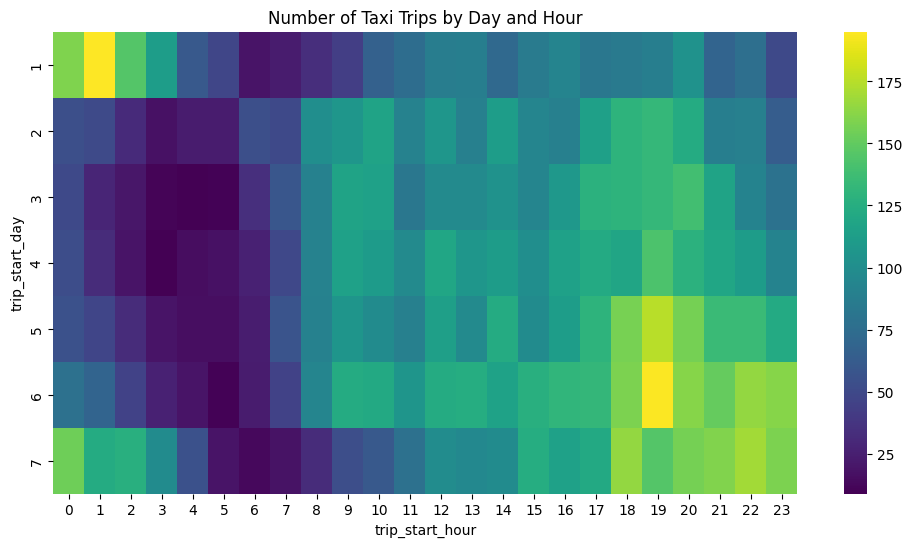

In [27]:
# Create a heatmap showing trip frequency by the hour to identify the busiest hours for taxi trips
hourly_trips = df.groupby(['trip_start_day', 'trip_start_hour']).size()
hourly_trips = hourly_trips.reset_index(name='count')
hourly_trips = hourly_trips.pivot(index='trip_start_day', columns='trip_start_hour', values='count')
plt.figure(figsize=(12, 6))
sns.heatmap(hourly_trips, cmap='viridis')
plt.title('Number of Taxi Trips by Day and Hour')
plt.show()

array([[<Axes: title={'center': 'trip_miles'}>]], dtype=object)

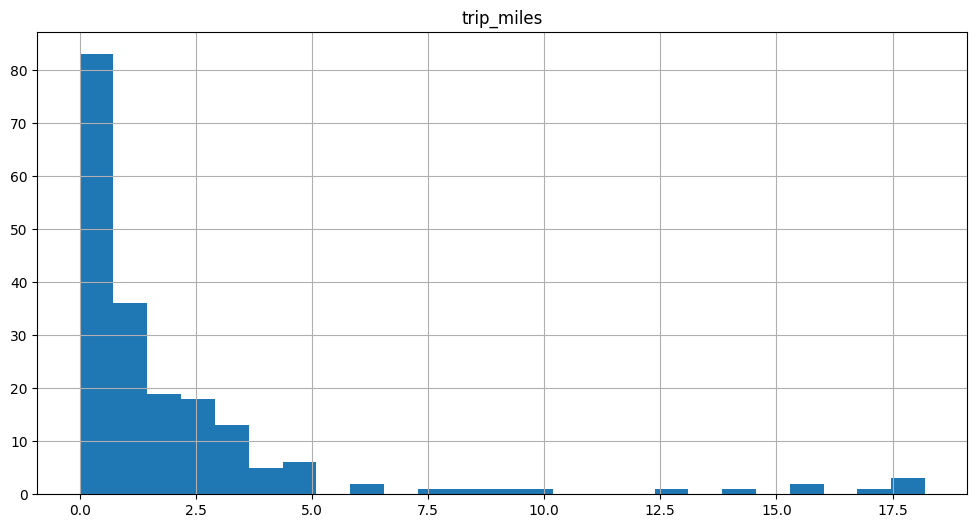

In [32]:
df[(df['trip_start_day'] == 6) & (df['trip_start_hour'] == 19)].hist('trip_miles', bins=25, figsize=(12, 6))

array([[<Axes: title={'center': 'trip_miles'}>]], dtype=object)

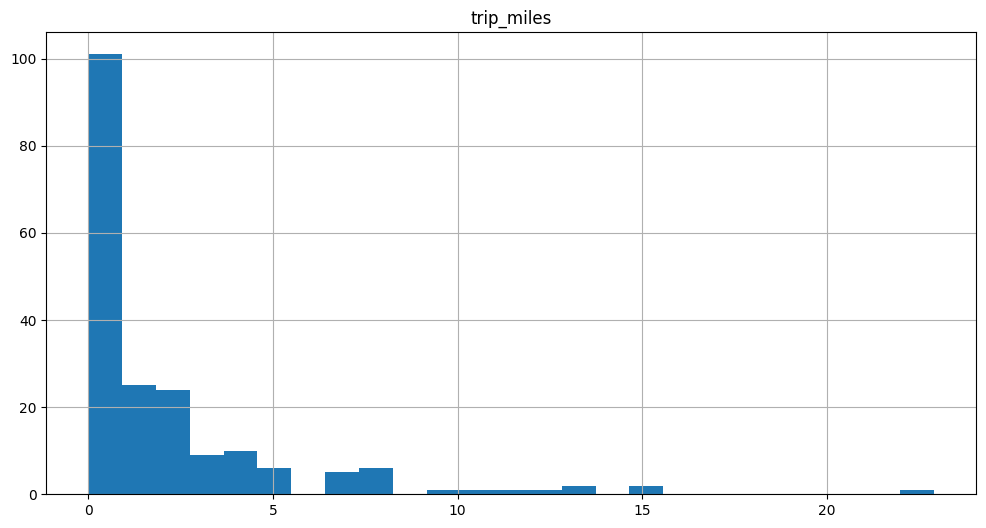

In [33]:
df[(df['trip_start_day'] == 1) & (df['trip_start_hour'] == 1)].hist('trip_miles', bins=25, figsize=(12, 6))

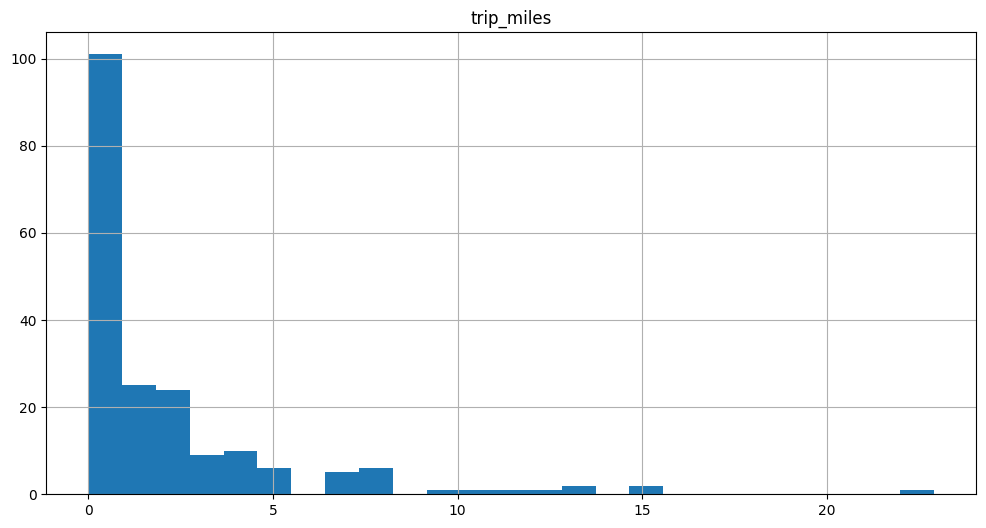

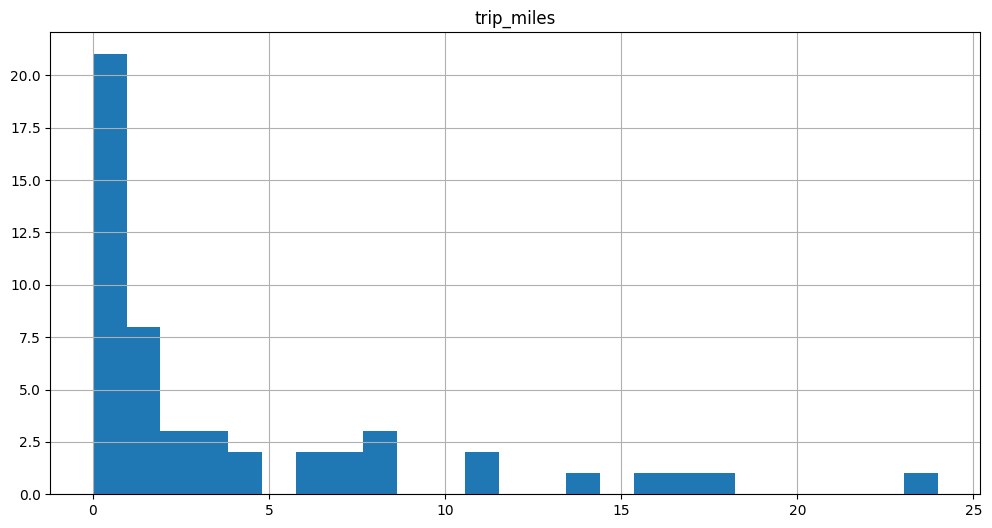

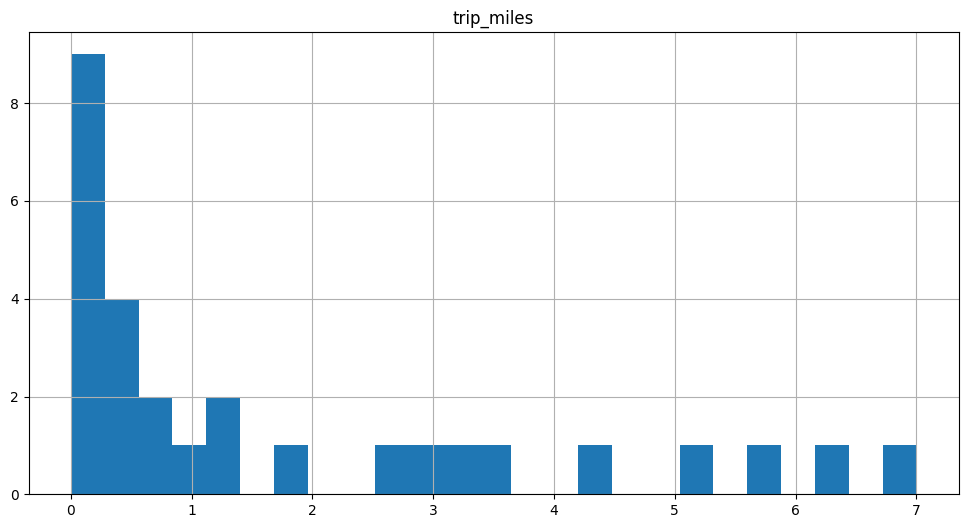

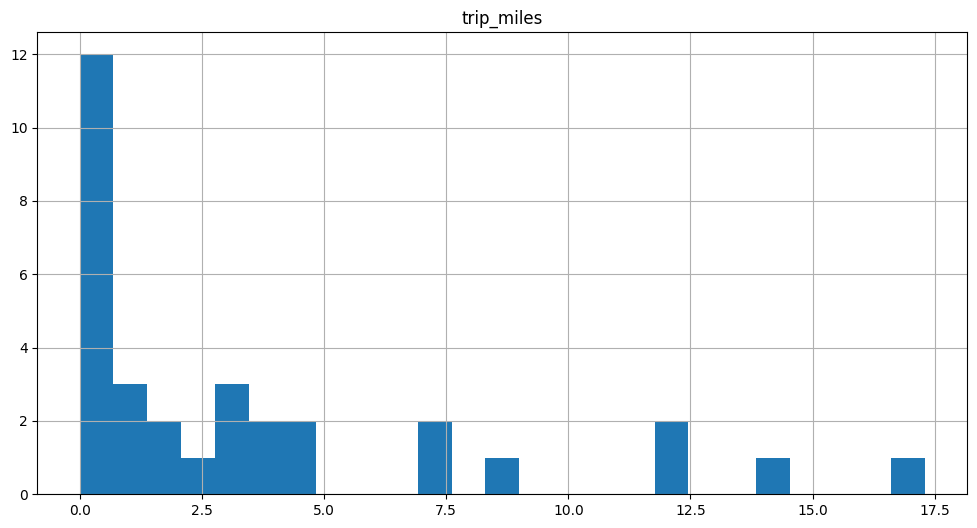

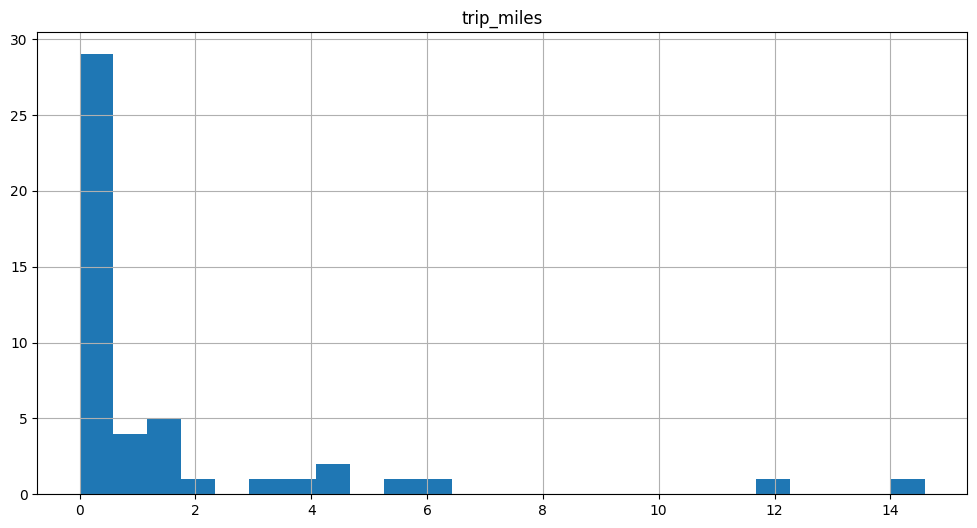

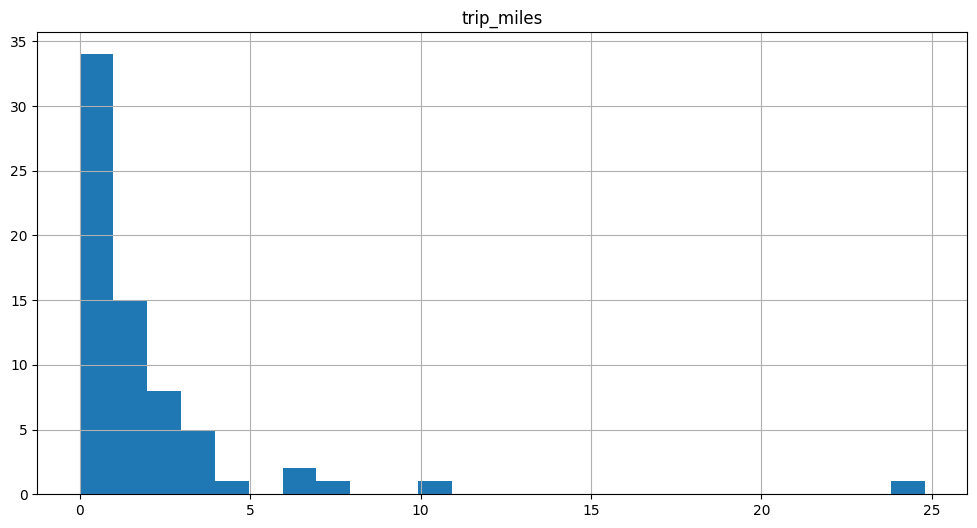

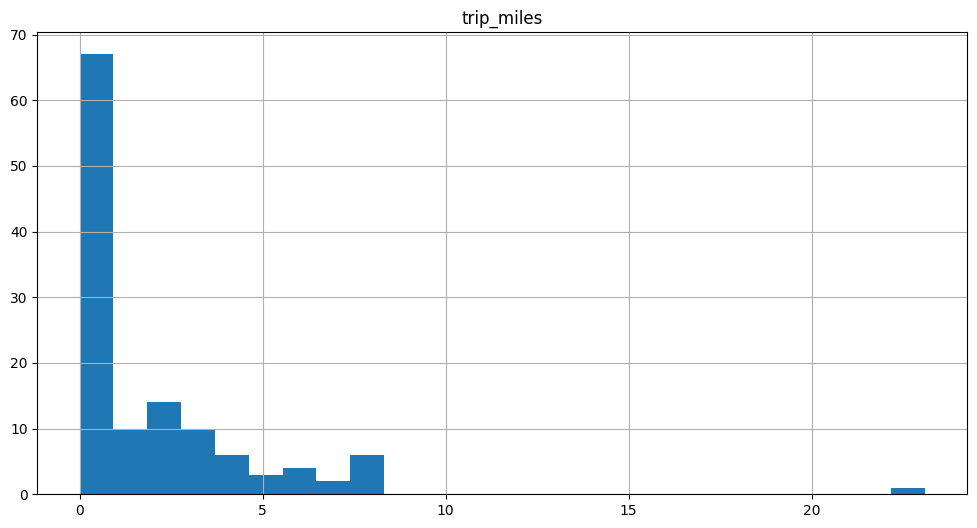

In [34]:
for day in range(1, 8):
    df[(df['trip_start_day'] == day) & (df['trip_start_hour'] == 1)].hist('trip_miles', bins=25, figsize=(12, 6))

## Q 2.c

<Axes: >

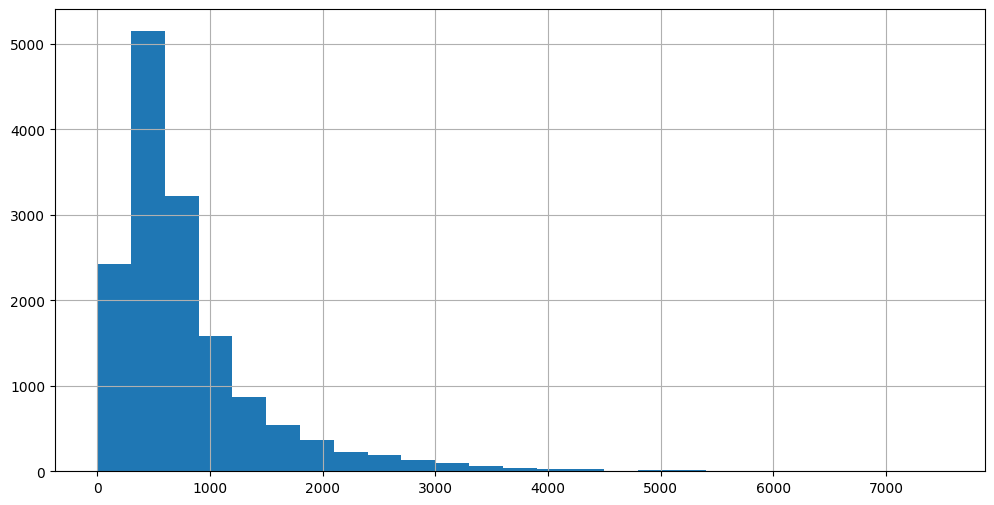

In [43]:
df[df['trip_seconds'] < 10000]['trip_seconds'].hist(bins=25, figsize=(12, 6))

<Axes: >

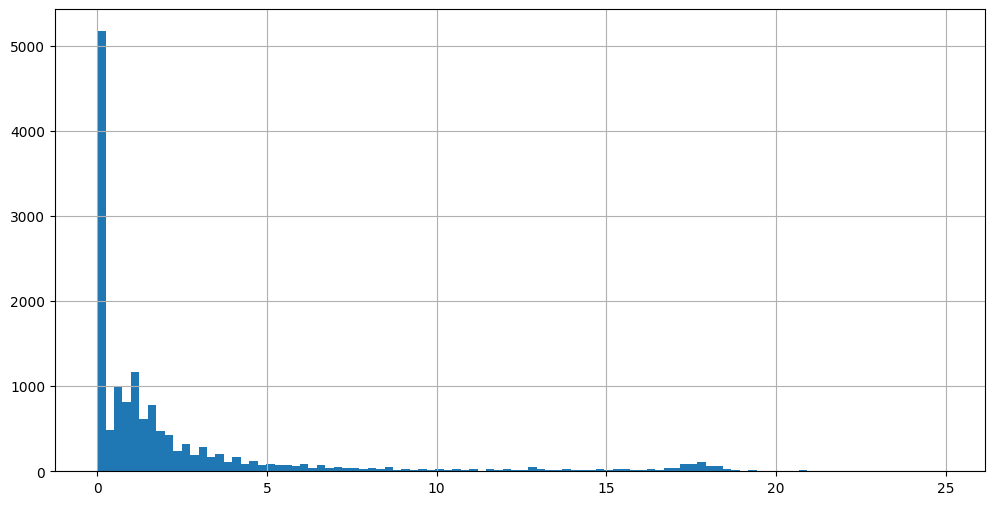

In [55]:
df[df['trip_miles'] < 25]['trip_miles'].hist(bins=100, figsize=(12, 6))

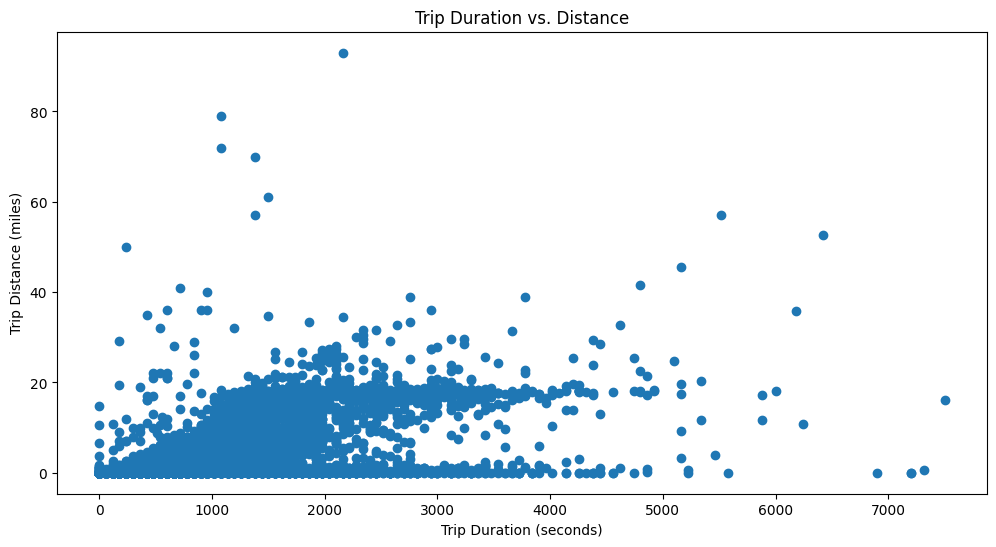

In [63]:
# Use a scatter plot to show the relationship between trip duration and distance
plt.figure(figsize=(12, 6))
plt.scatter(df[(df['trip_seconds'] < 10000) & (df['trip_miles'] < 100)]['trip_seconds'], df[(df['trip_seconds'] < 10000) & (df['trip_miles'] < 100)]['trip_miles'])
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Trip Distance (miles)')
plt.title('Trip Duration vs. Distance')
plt.show()

## Q 2.d

In [93]:
monthly_data = pd.DataFrame(df.groupby('trip_start_month').count()['tips'])
monthly_data.columns = ['trip_count']
# monthly_data = df.groupby('trip_start_month').count()['tips']
monthly_data['trip_miles'] = df.groupby('trip_start_month').sum()['trip_miles'] / df.groupby('trip_start_month').count()['trip_miles']

<Axes: xlabel='trip_start_month'>

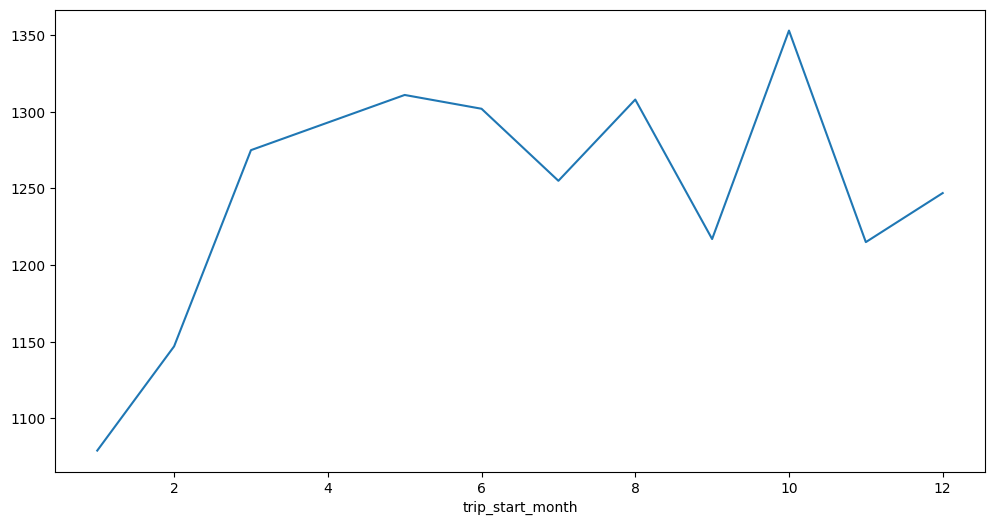

In [100]:
# plot on different plots
monthly_data['trip_count'].plot(kind='line', figsize=(12, 6))

<Axes: xlabel='trip_start_month'>

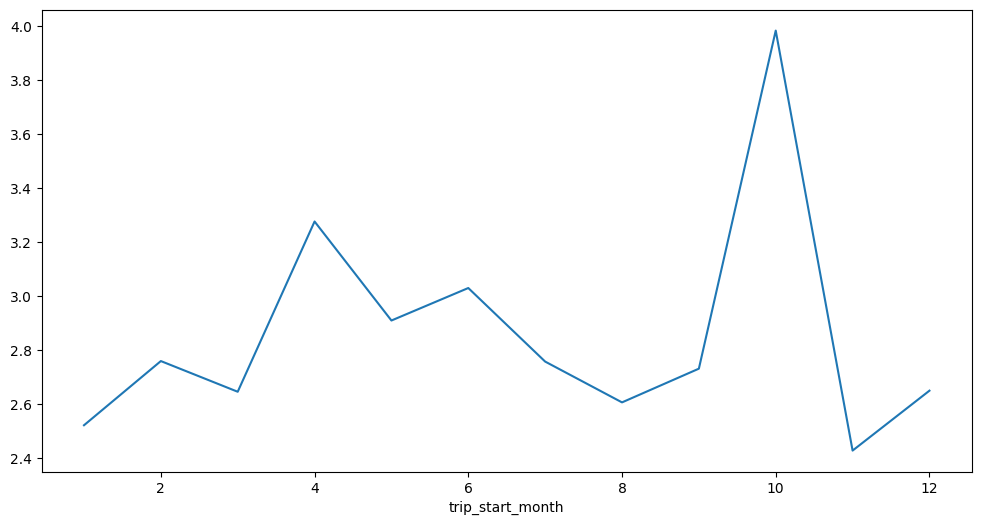

In [99]:
# df.groupby('trip_start_month').sum()['trip_miles']
monthly_data['trip_miles'].plot(kind='line', figsize=(12, 6))

## Q 2.e

/home/balaji/venv/lib/python3.12/site-packages/pandas/plotting/_matplotlib/tools.py:233: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(**fig_kw)


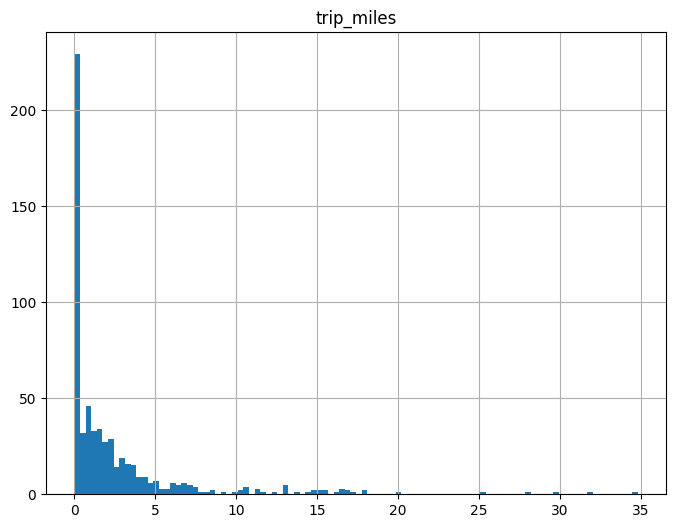

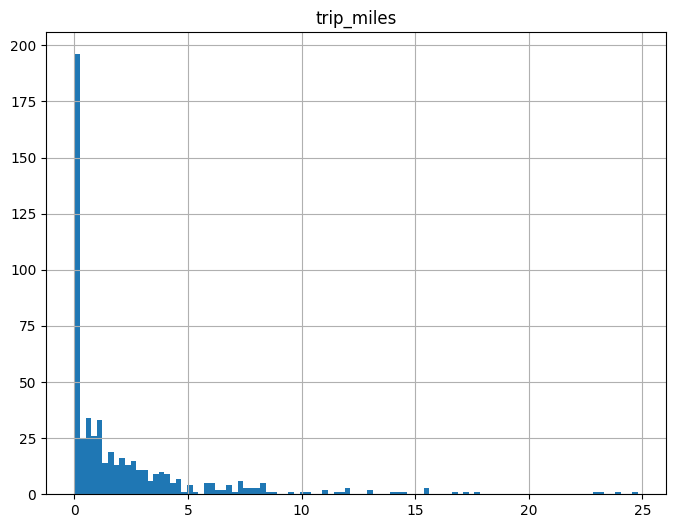

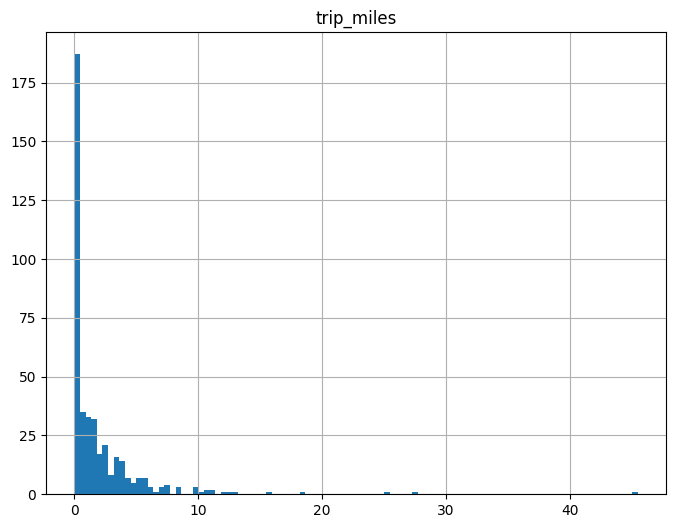

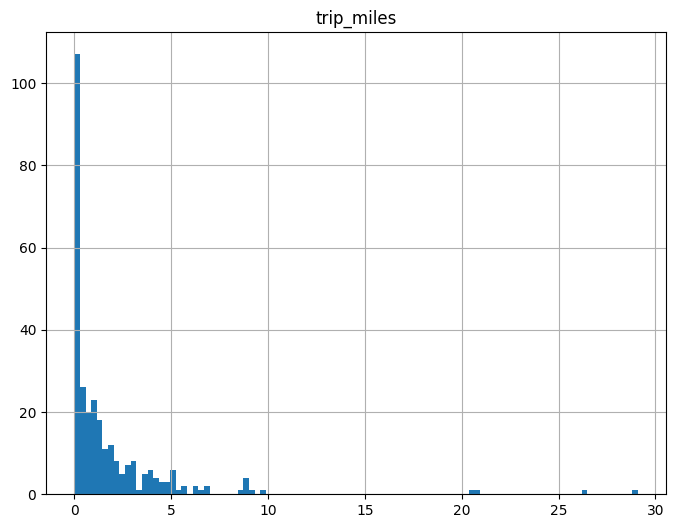

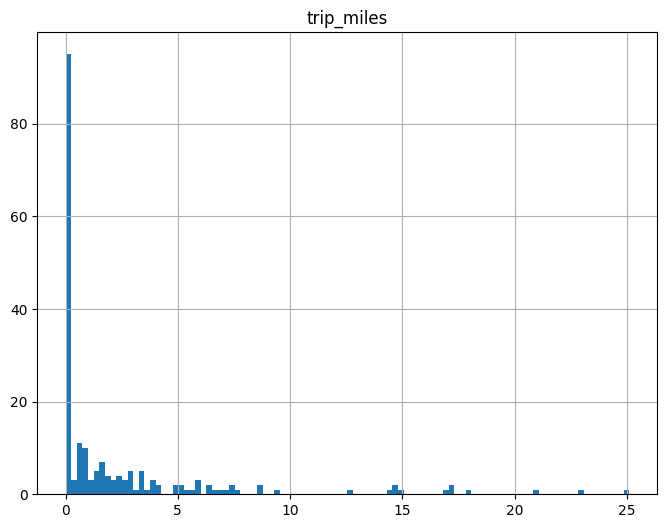

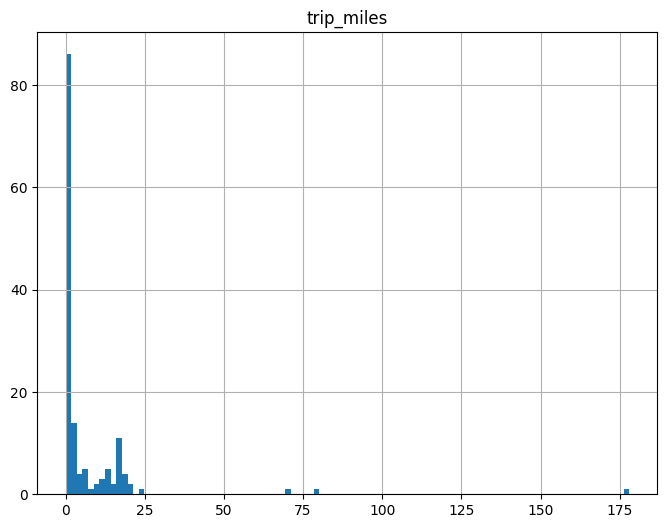

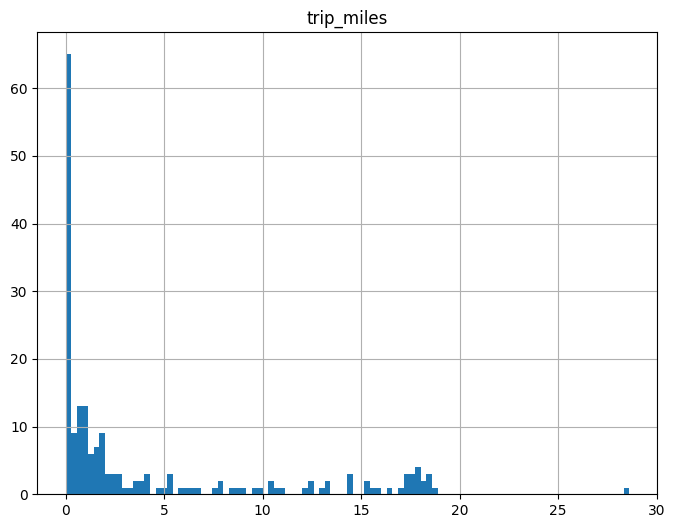

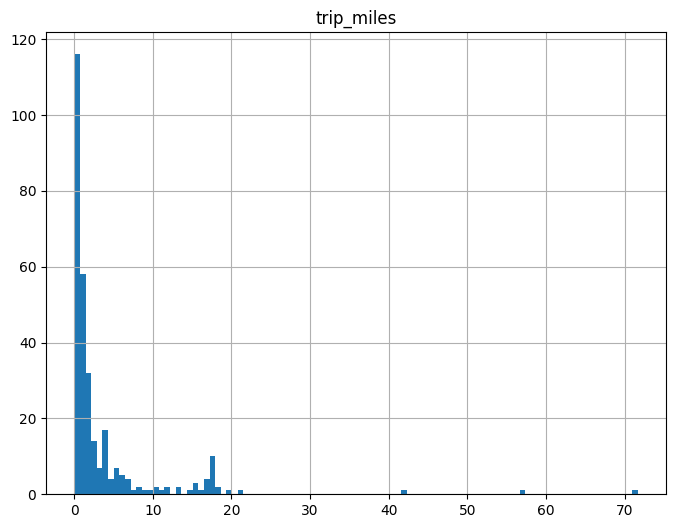

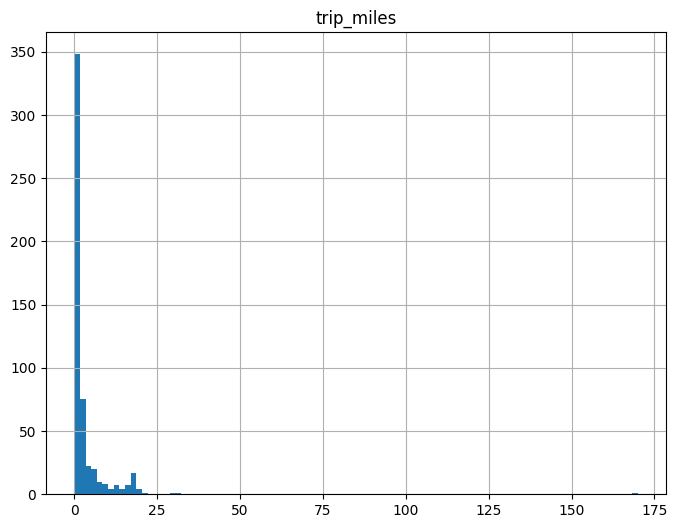

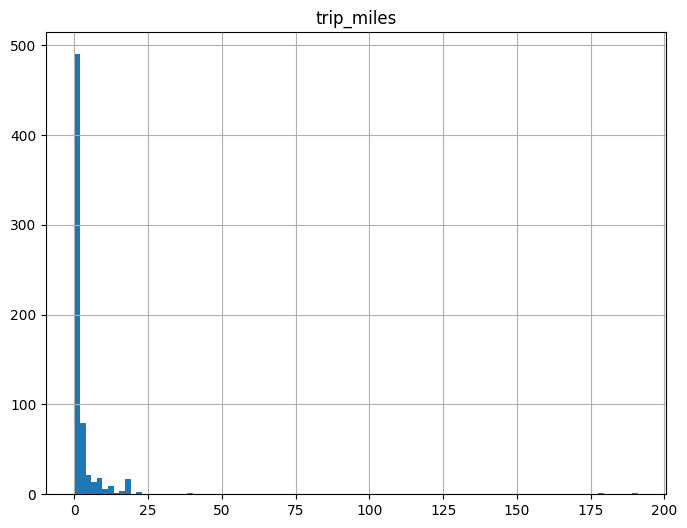

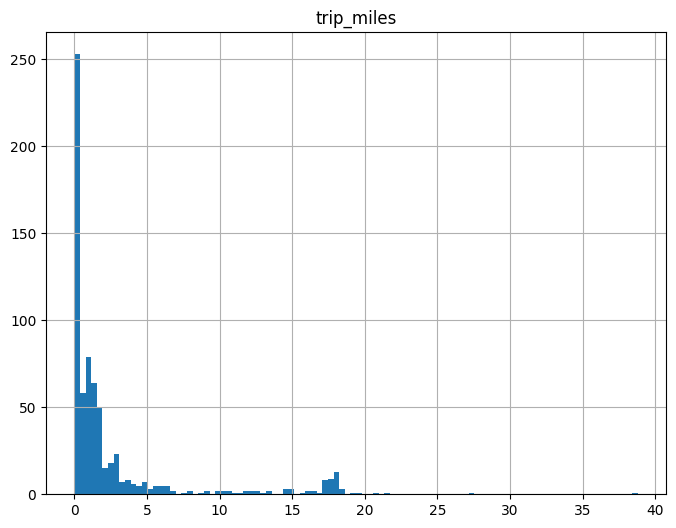

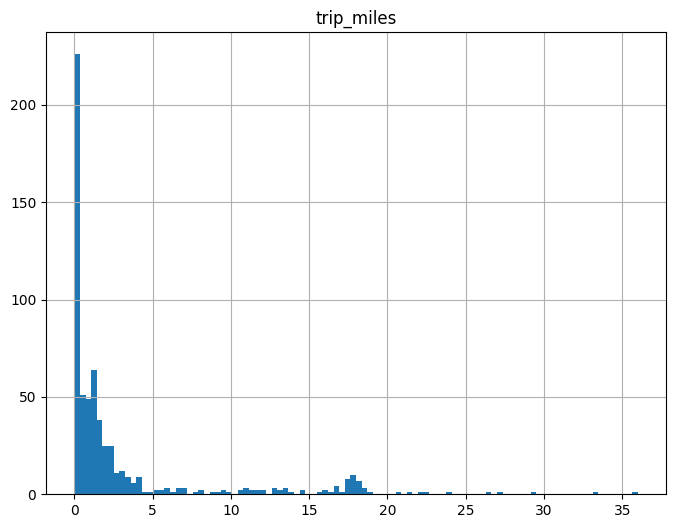

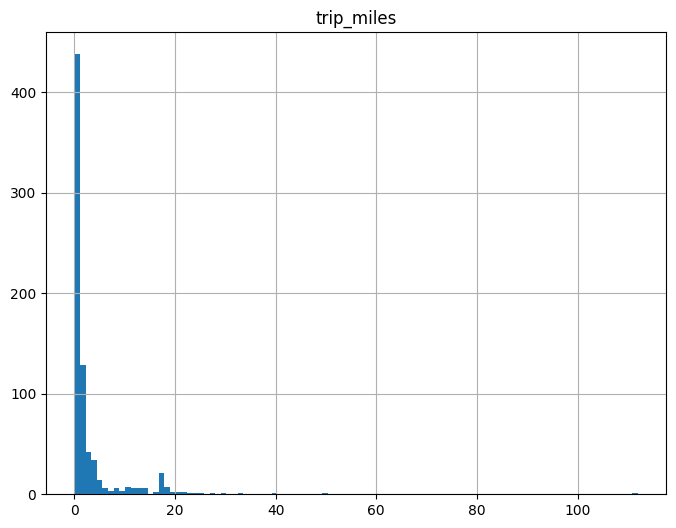

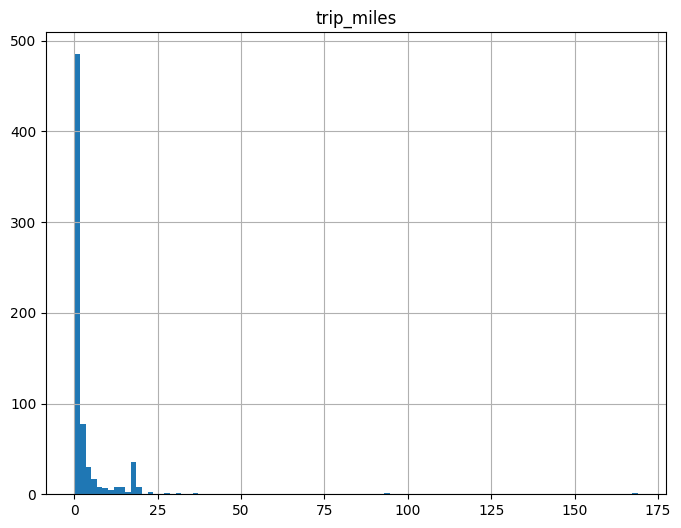

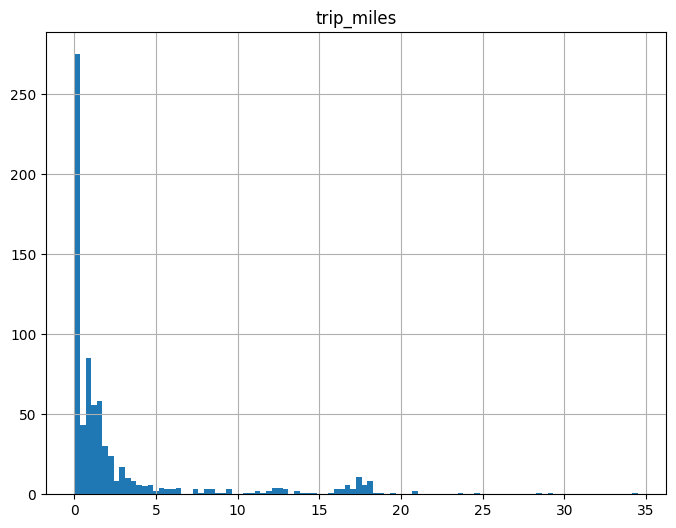

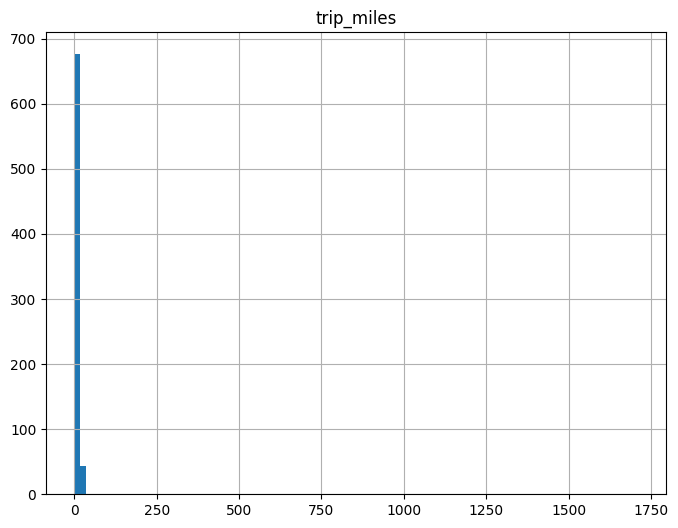

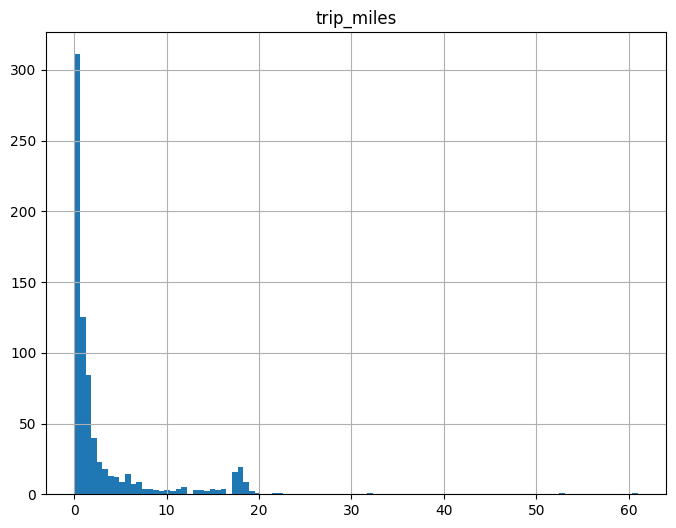

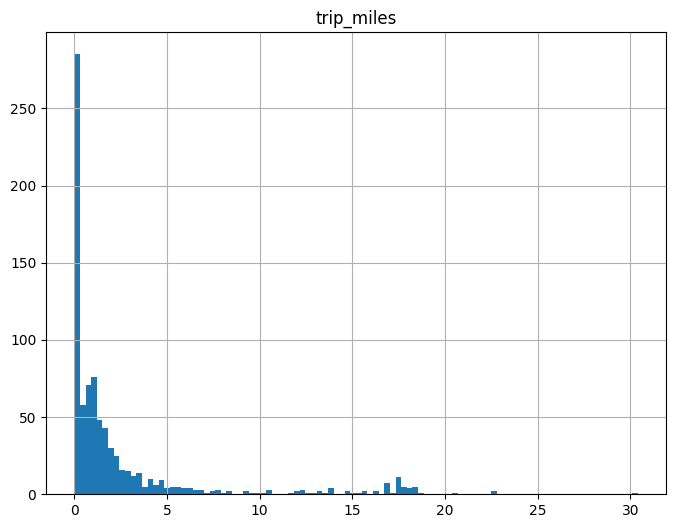

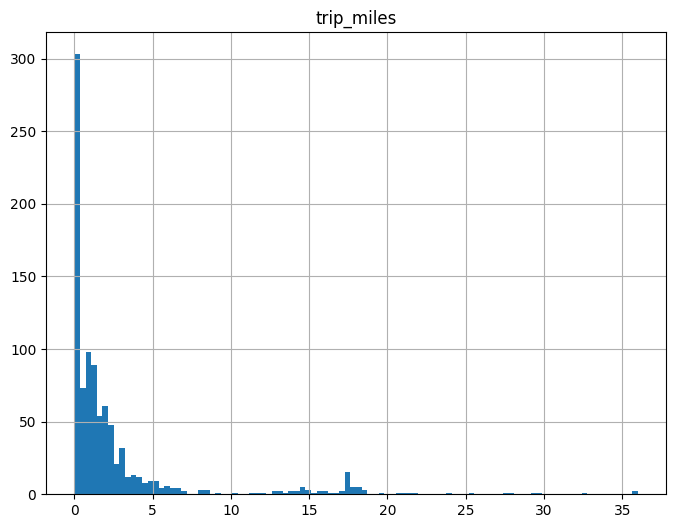

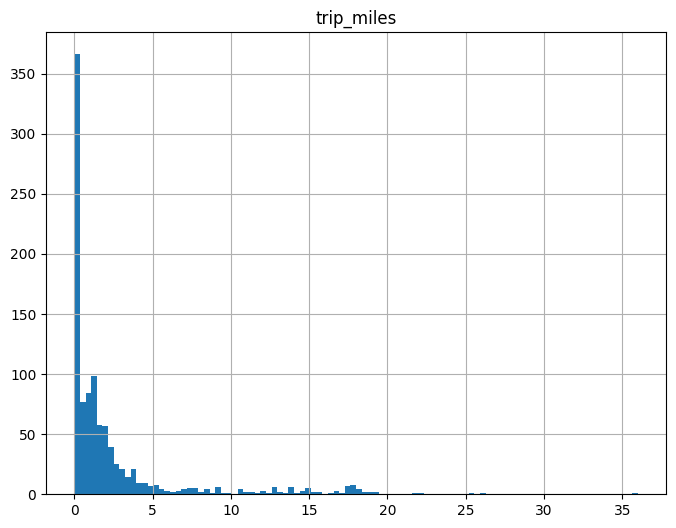

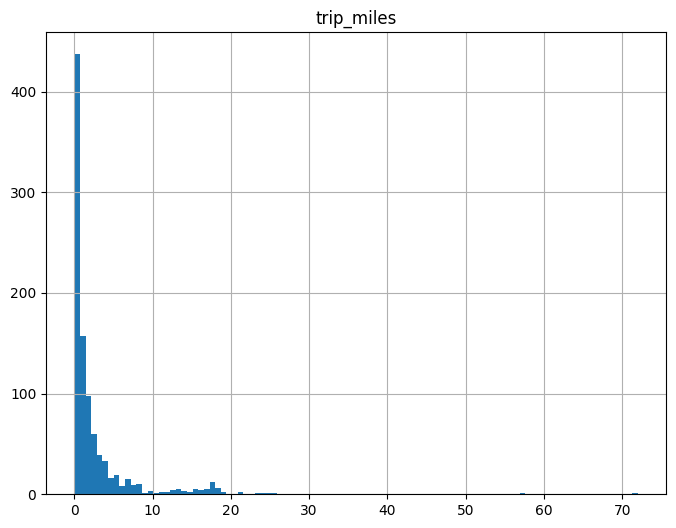

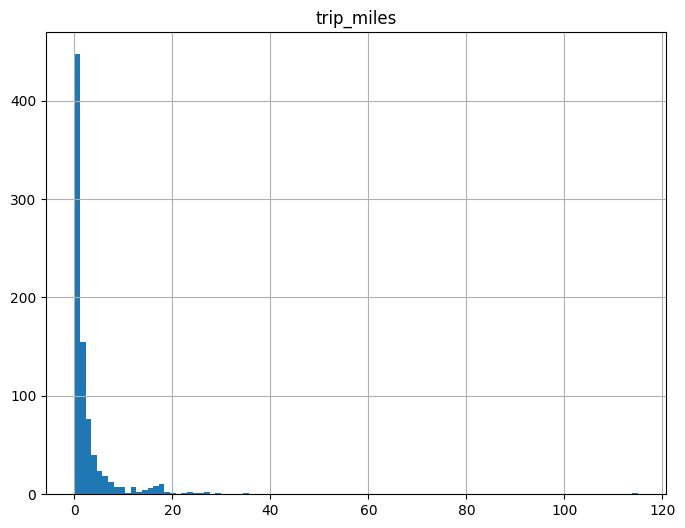

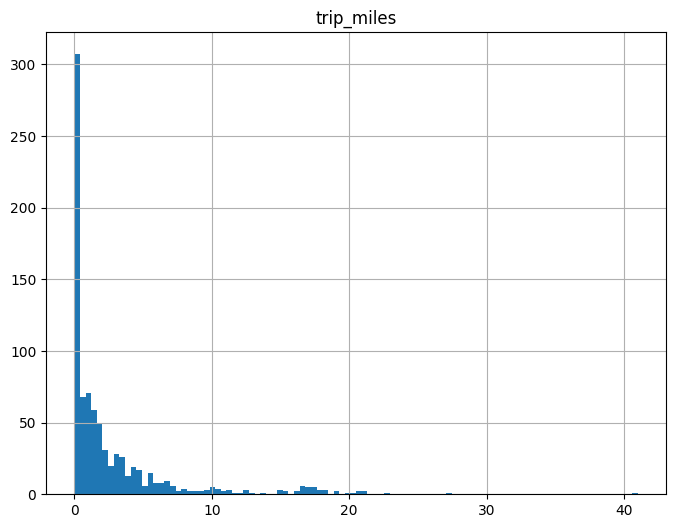

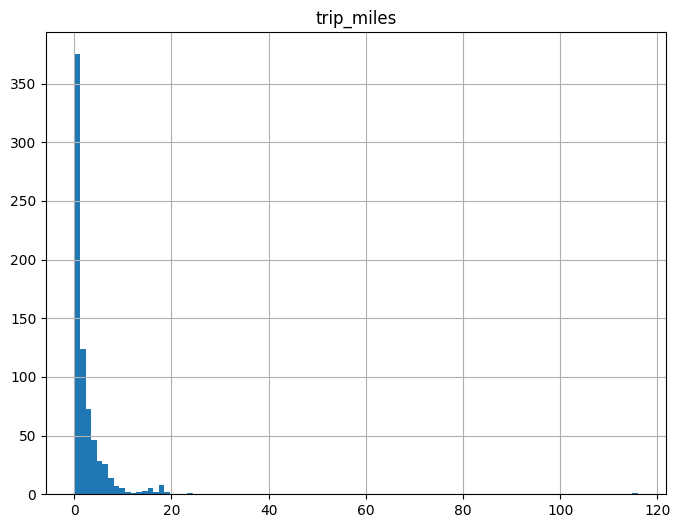

In [108]:
from turtle import title


for hour in range(0, 24):
    df[df['trip_start_hour'] == hour].hist('trip_miles', bins=100, figsize=(8, 6))